<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/simulate_collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

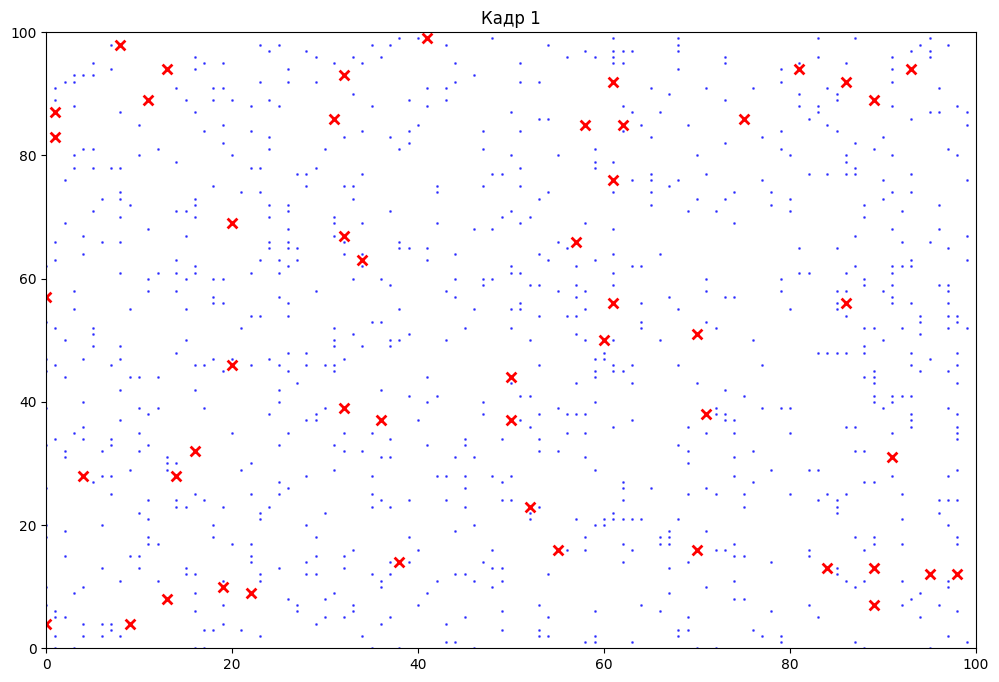

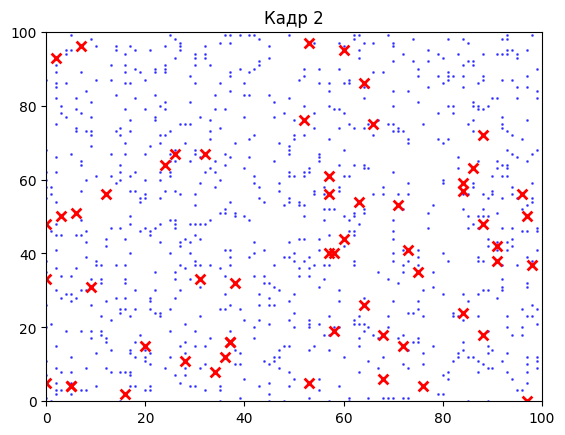

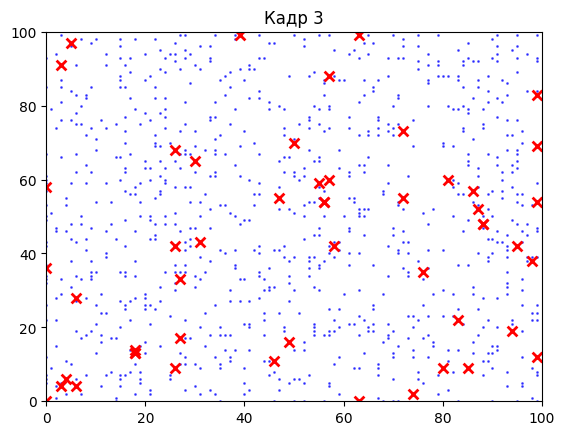

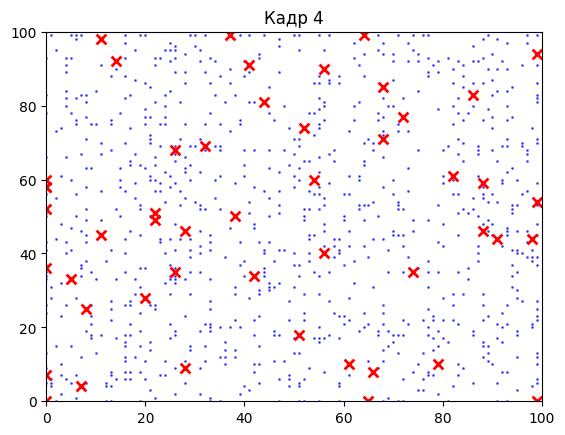

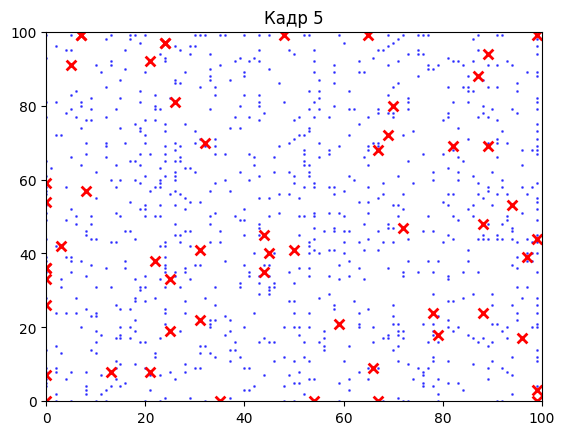

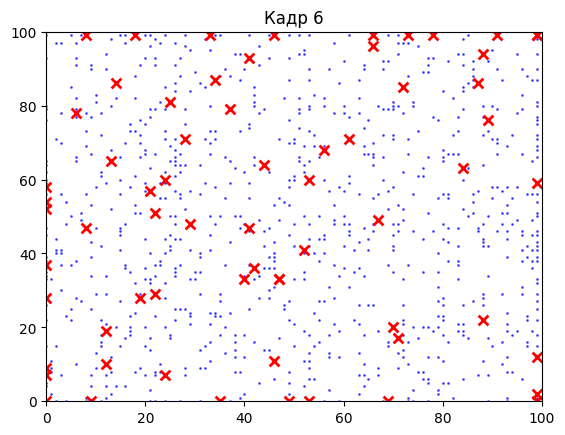

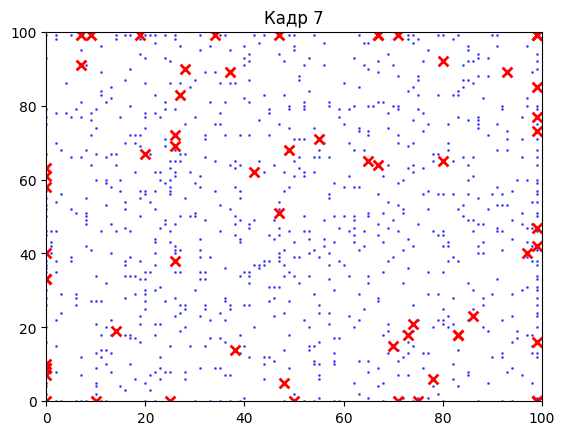

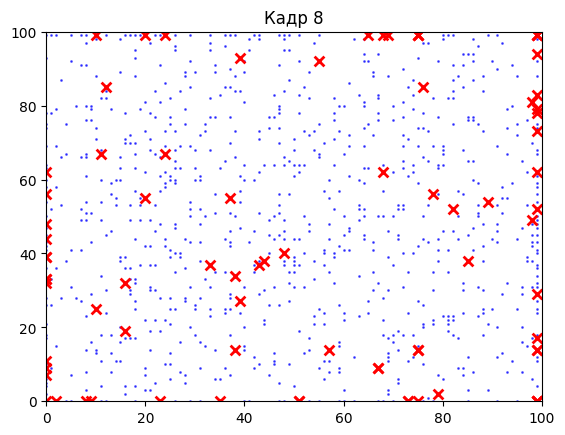

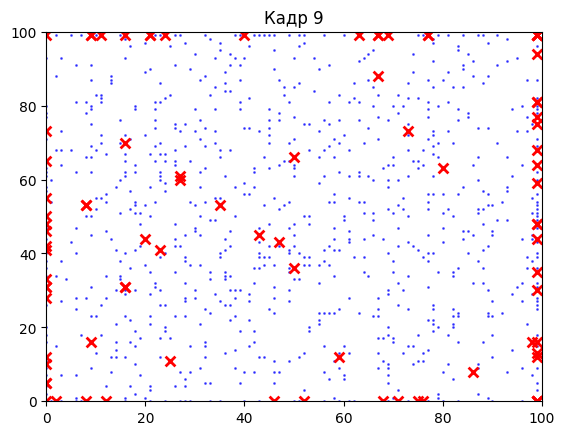

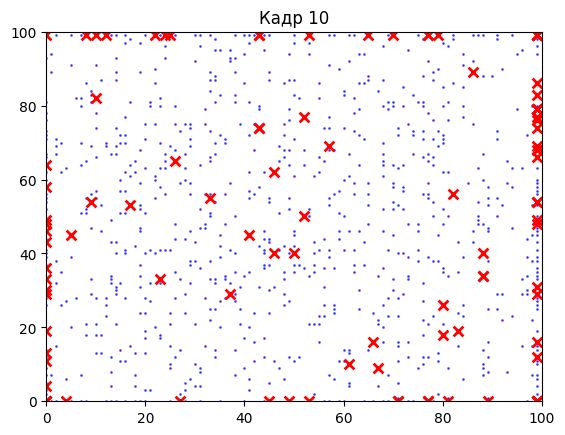

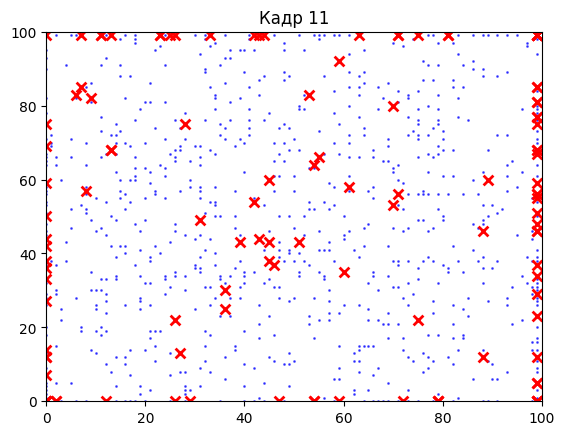

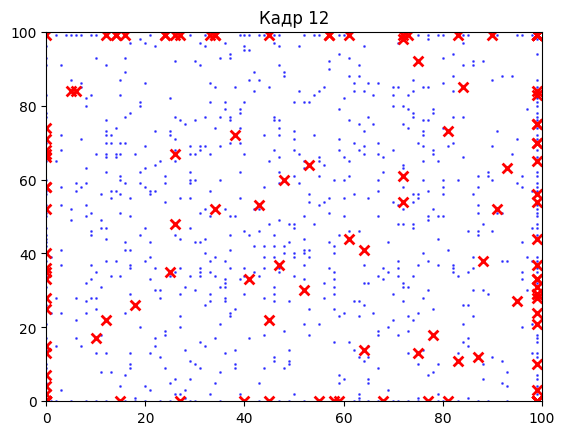

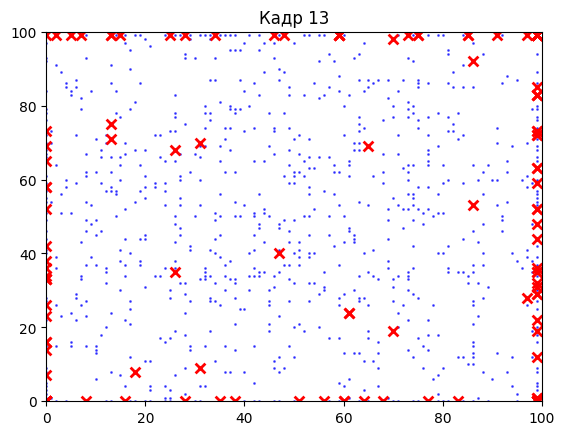

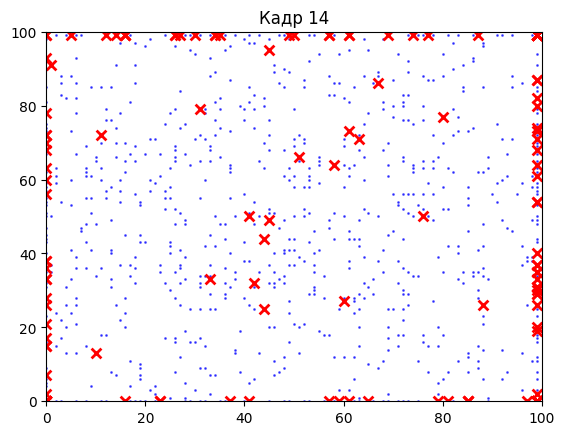

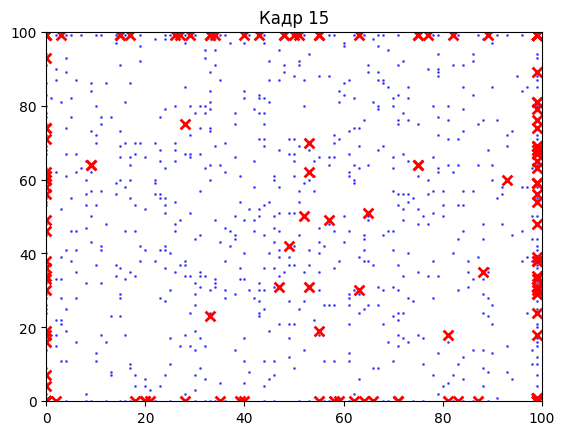

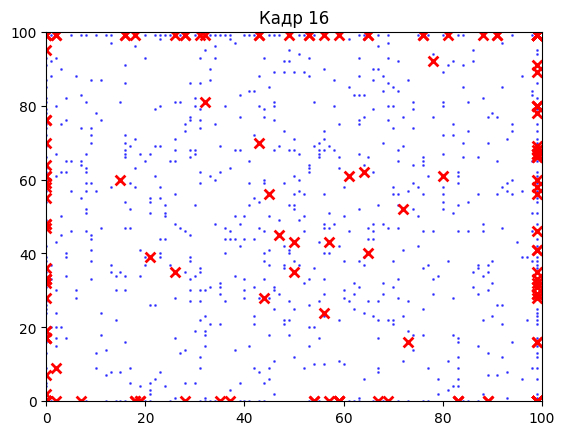

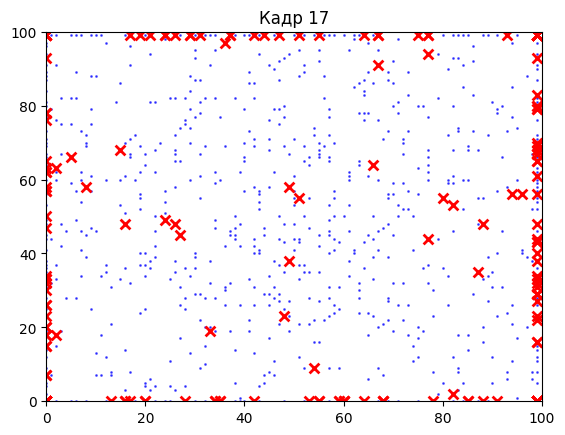

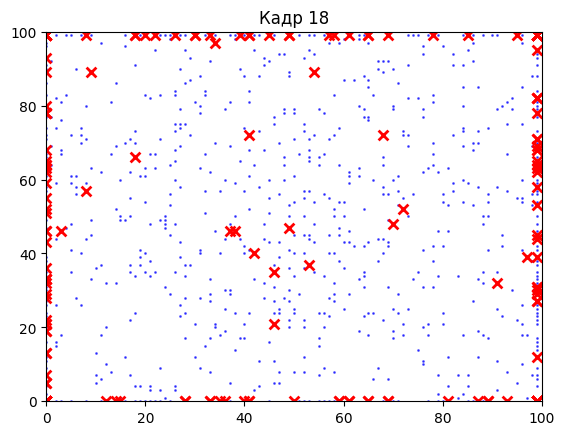

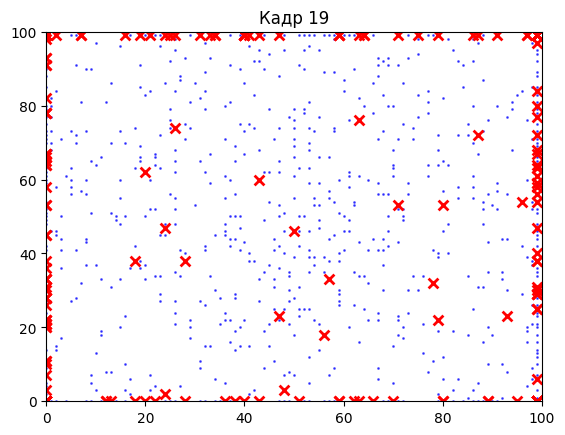

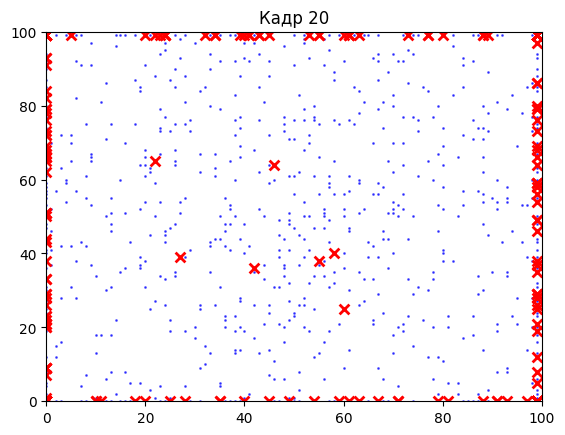

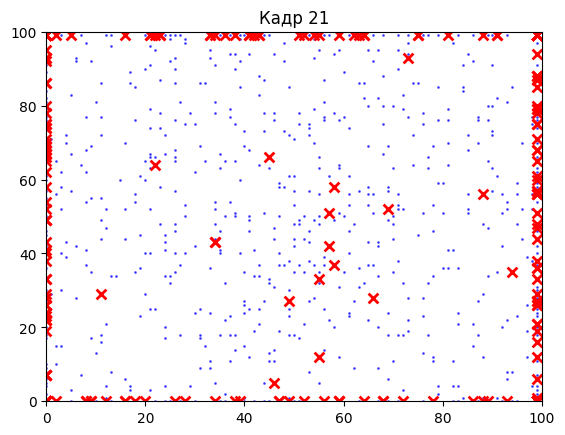

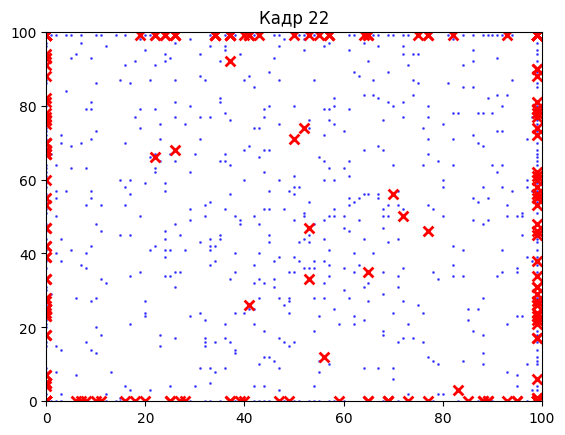

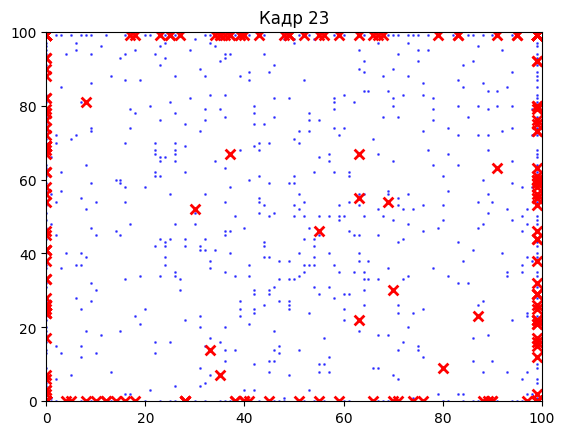

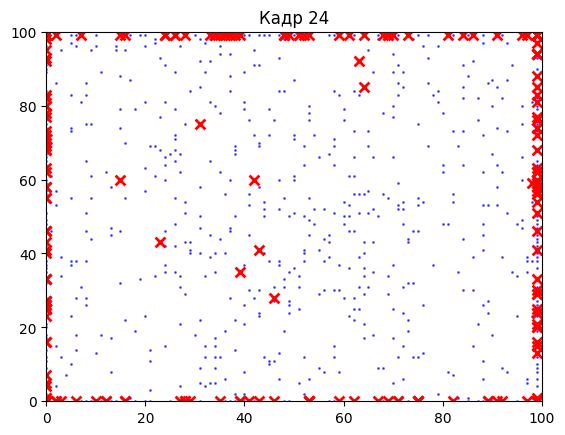

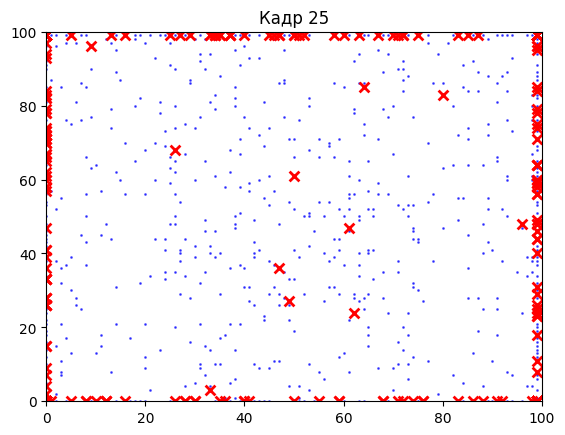

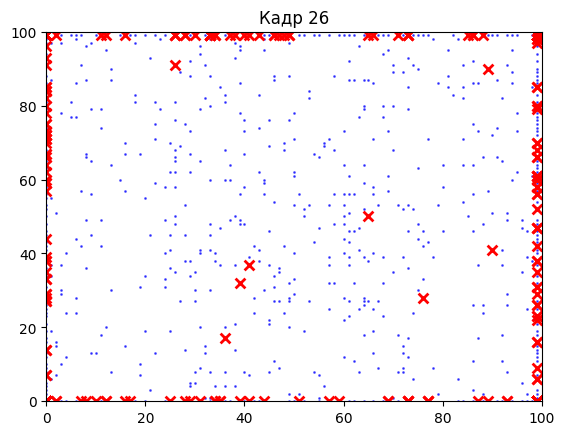

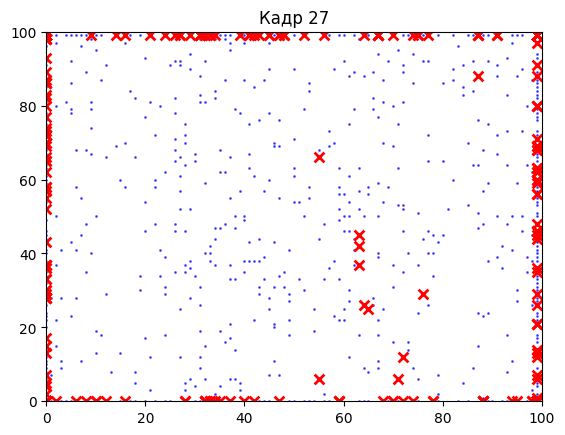

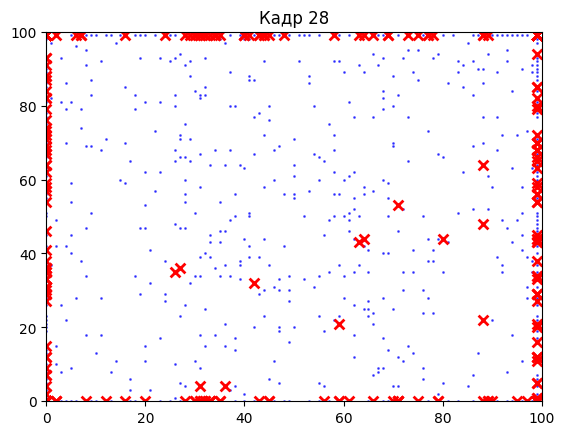

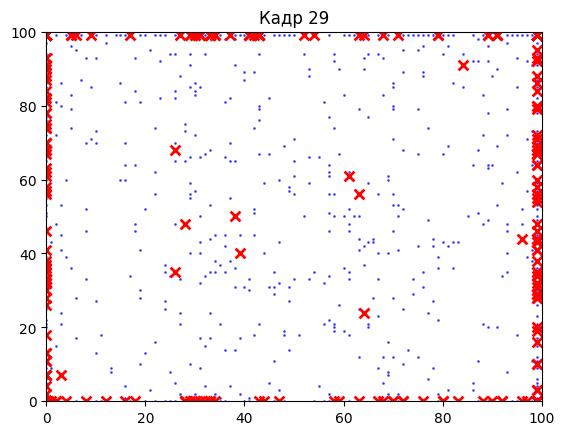

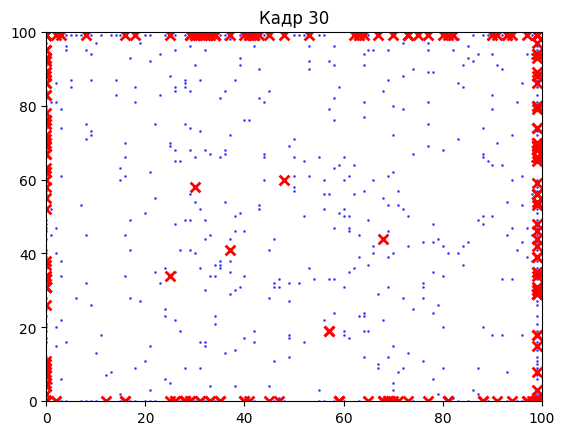

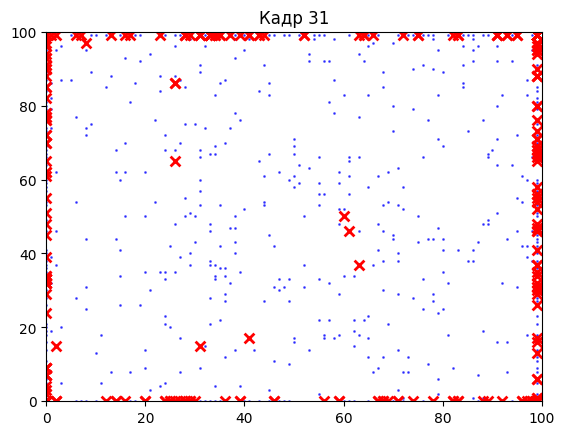

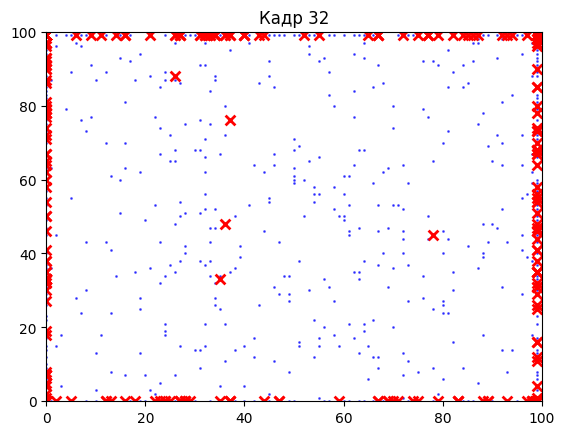

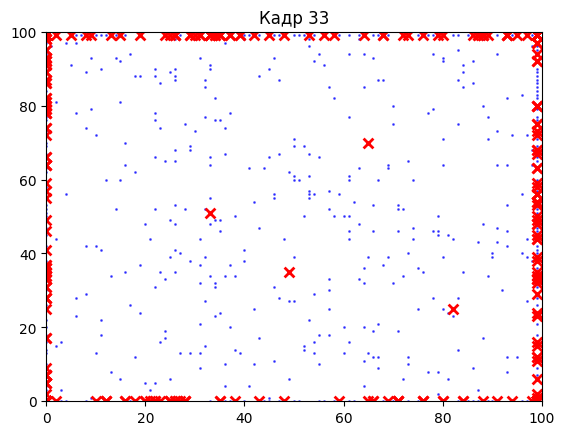

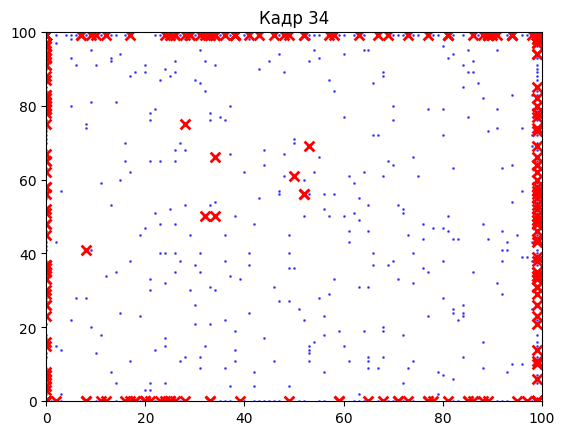

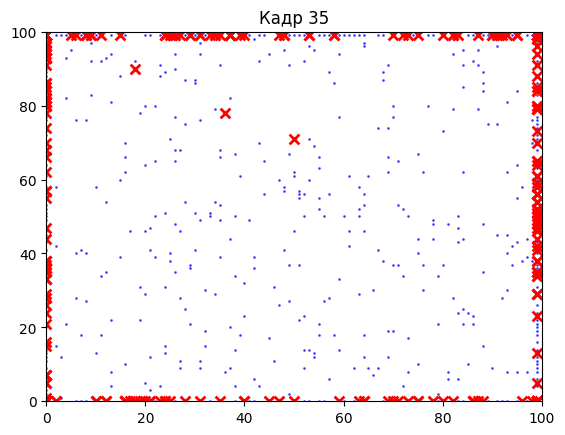

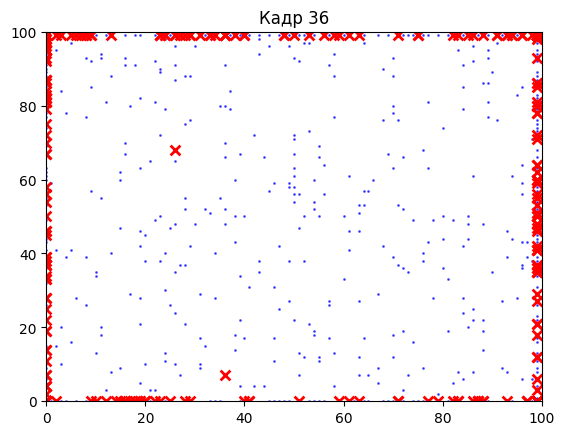

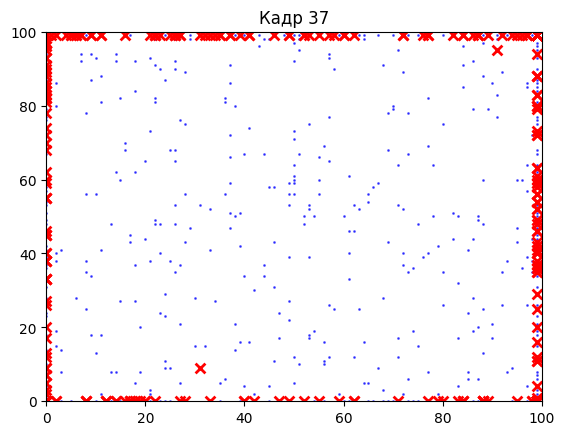

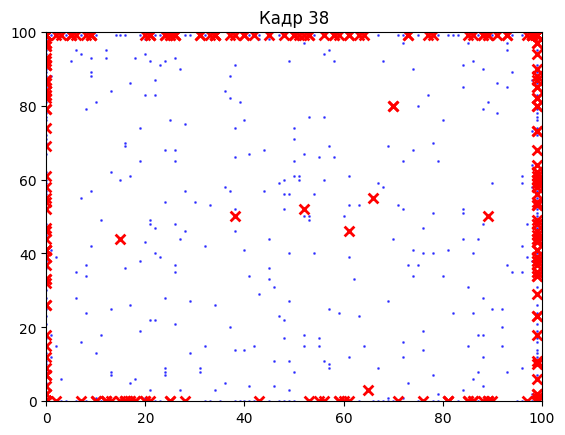

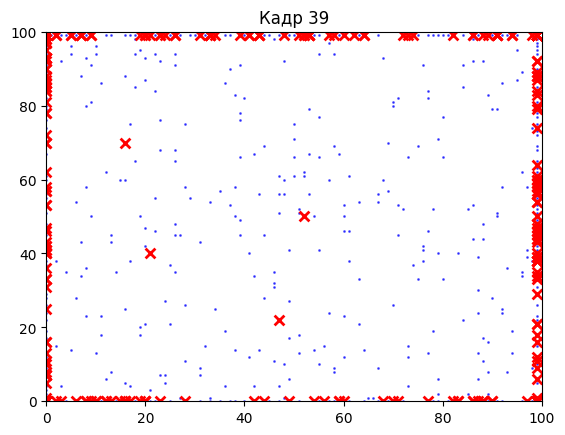

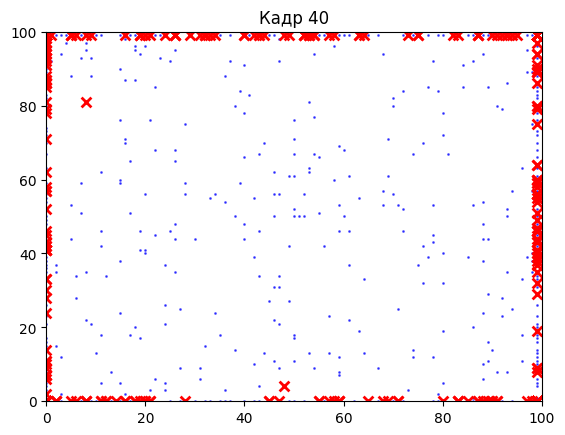

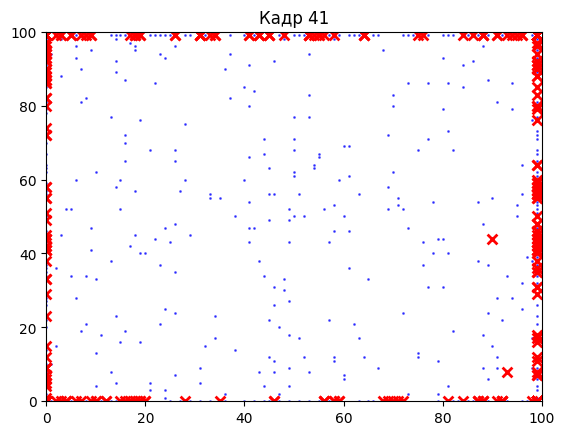

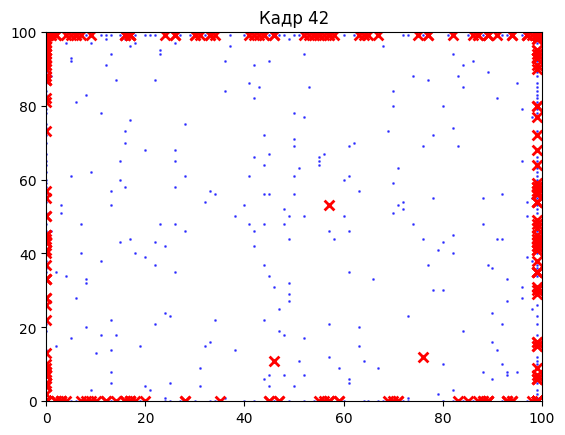

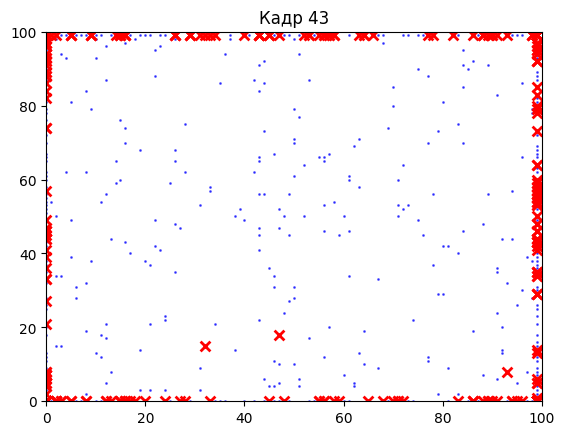

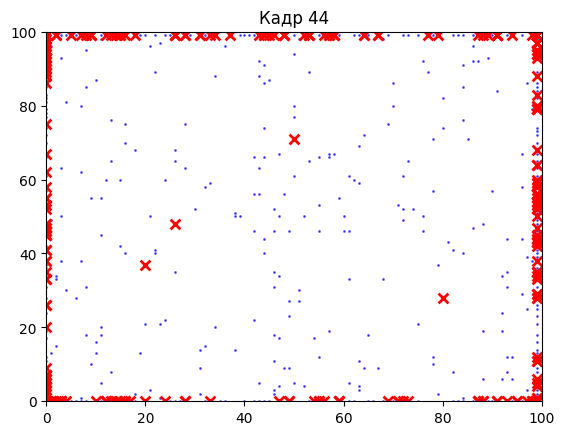

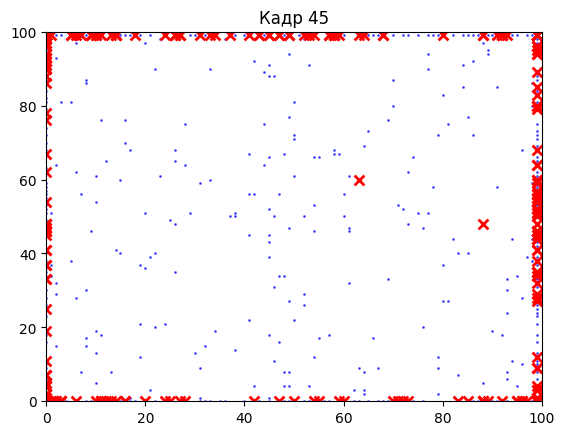

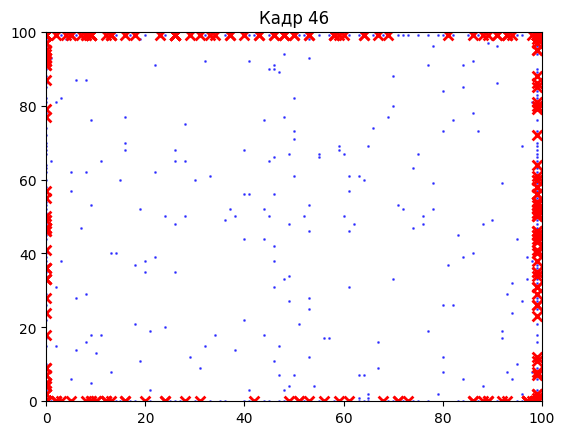

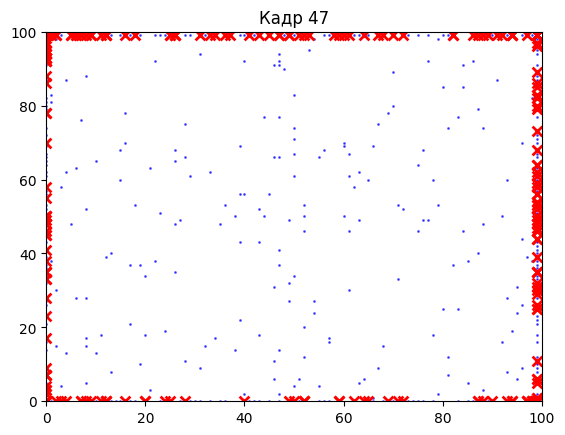

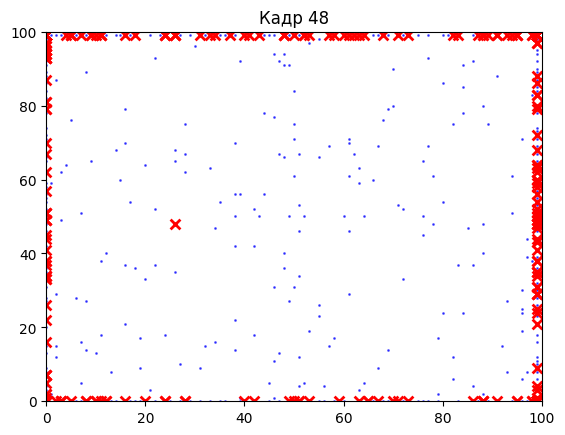

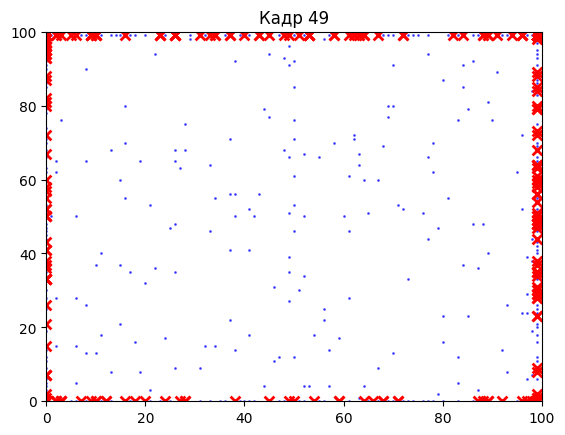

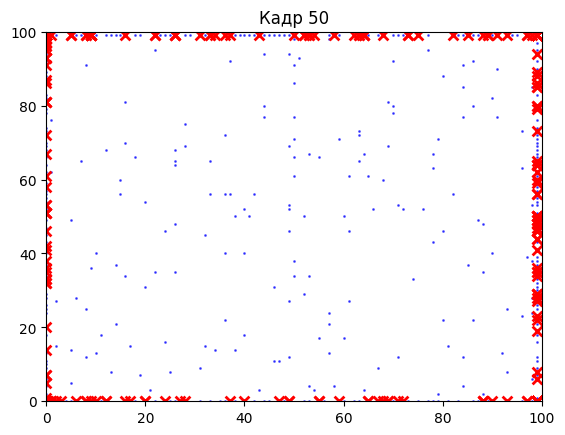

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_particles():
    s, f, n = 100, 50, 1000  # Меньше частиц для визуализации

    np.random.seed(42)
    p = np.random.randint(0, s, (n, 2))
    v = np.random.randint(-2, 3, (n, 2))

    plt.figure(figsize=(12, 8))

    for i in range(f):
        c = np.clip(p + i * v, 0, s-1)

        # Находим столкновения
        idx = np.lexsort((c[:, 1], c[:, 0]))
        sorted_c = c[idx]
        diffs = np.diff(sorted_c, axis=0)
        collisions = np.all(diffs == 0, axis=1)

        plt.clf()
        # Все частицы
        plt.scatter(c[:, 0], c[:, 1], s=1, alpha=0.6, color='blue')

        # Столкновения красным
        if np.any(collisions):
            collision_indices = np.where(collisions)[0]
            collision_positions = sorted_c[collision_indices]
            plt.scatter(collision_positions[:, 0], collision_positions[:, 1],
                       s=50, color='red', marker='x', linewidth=2)

        plt.xlim(0, s)
        plt.ylim(0, s)
        plt.title(f'Кадр {i+1}')
        plt.pause(0.1)

    plt.show()

visualize_particles()

In [22]:
import plotly.express as px
import pandas as pd
import numpy as np

def interactive_visualization():
    s, f, n = 200, 20, 500

    np.random.seed(42)
    p = np.random.randint(0, s, (n, 2))
    v = np.random.randint(-3, 4, (n, 2))

    frames_data = []
    for i in range(f):
        c = np.clip(p + i * v, 0, s-1)

        # Определяем столкновения
        idx = np.lexsort((c[:, 1], c[:, 0]))
        sorted_c = c[idx]
        diffs = np.diff(sorted_c, axis=0)
        collisions = np.all(diffs == 0, axis=1)

        # Создаем DataFrame для кадра
        frame_df = pd.DataFrame(c, columns=['x', 'y'])
        frame_df['frame'] = i
        frame_df['color'] = 'blue'

        # Помечаем столкновения
        if np.any(collisions):
            collision_indices = np.where(collisions)[0]
            for idx in collision_indices:
                collision_pos = sorted_c[idx]
                mask = (frame_df['x'] == collision_pos[0]) & (frame_df['y'] == collision_pos[1])
                frame_df.loc[mask, 'color'] = 'red'

        frames_data.append(frame_df)

    all_data = pd.concat(frames_data)

    fig = px.scatter(all_data, x='x', y='y', animation_frame='frame',
                    color='color', range_x=[0, s], range_y=[0, s],
                    title='Движение частиц со столкновениями')
    fig.show()

interactive_visualization()  # Раскомментируйте для запуска

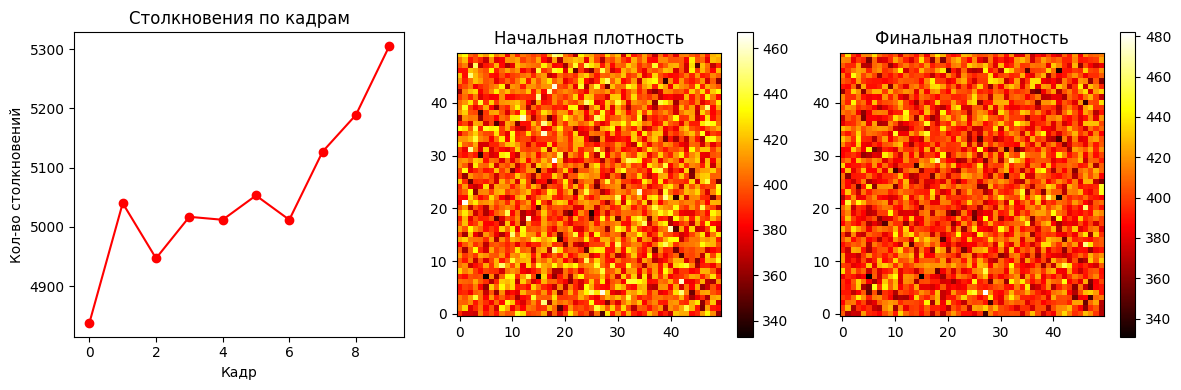

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def statistical_visualization():
    s, f, n = 10000, 10, 1000000

    np.random.seed(42)
    p = np.random.randint(0, s, (n, 2))
    v = np.random.randint(-5, 6, (n, 2))

    collision_history = []

    for i in range(f):
        c = np.clip(p + i * v, 0, s-1)
        idx = np.lexsort((c[:, 1], c[:, 0]))
        sorted_c = c[idx]
        diffs = np.diff(sorted_c, axis=0)
        collision_count = np.count_nonzero((diffs == 0).all(axis=1))
        collision_history.append(collision_count)

    # Визуализация статистики
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.plot(range(f), collision_history, 'ro-')
    plt.title('Столкновения по кадрам')
    plt.xlabel('Кадр')
    plt.ylabel('Кол-во столкновений')

    plt.subplot(132)
    density = np.histogram2d(p[:, 0], p[:, 1], bins=50, range=[[0, s], [0, s]])[0]
    plt.imshow(density, cmap='hot', origin='lower')
    plt.title('Начальная плотность')
    plt.colorbar()

    plt.subplot(133)
    final_positions = np.clip(p + (f-1) * v, 0, s-1)
    final_density = np.histogram2d(final_positions[:, 0], final_positions[:, 1],
                                 bins=50, range=[[0, s], [0, s]])[0]
    plt.imshow(final_density, cmap='hot', origin='lower')
    plt.title('Финальная плотность')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

statistical_visualization()